## Усков Константин Александрович
### БАСО-03-20
# **Дисциплина «Информационные технологии»**
# **Рабочая тетрадь №7**
---
## **Теоретический материал – Нейронные сети**
---
Обучение персептрона

Персептрон представляет собой элементарную часть нейронной сети. Одиночный персептрон является линейным бинарным классификатором. В этой лекции мы рассмотрим процедуру обучения персептрона для классификации данных. Поскольку персептрон представляет собой бинарный классификатор, то мы будем рассматривать лишь два класса.

Пусть мы рассматриваем некоторое множество (конечное или бесконечное) n-мерных векторов, которые будем обозначать $𝑥=(𝑥_1,𝑥_2,...,𝑥_𝑛)$

Будем считать, что это множество разбивается на два класса, которые мы будем обозначать +1 и -1. Поэтому возникает задача построения функции, которая задана на нашем множестве векторов, и принимает значения в множестве {+1, −1}. В качестве такой функции может выступать персептрон. С алгебраической точки зрения персептрон состоит из вектора весов $𝑤=(𝑤_0,𝑤_1,𝑤_2,...,𝑤𝑛)$.

При этом персептрон работает по формуле

$𝑦={\tt s𝑖gn}(𝑤_0+𝑥_1𝑤_1+𝑥_2𝑤_2+...+𝑥_𝑛𝑤_𝑛)$,

где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.

Приведем алгоритм обучения персептрона. Пусть у нас есть набор обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества {+1, −1} указывает к какому классу относится наш вектор.

1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑛𝑔[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса $𝑤_0=𝑤_0+ad$, $𝑤_𝑖=𝑤_𝑖+𝑎𝑑𝑥_𝑖$, 𝑖 = 1,2, ..., 𝑛$.
Описанный алгоритм довольно легко программировать.

---
## **1.1.1 Пример**
---
### **Задача:**
Рассмотрим программу обучения персептрона на языке Python. Сначала
рассмотрим основной класс персептрона, который умеет учиться по
тестовым данным:
### **Решение:**
Начнем с описания объектов класса:

In [ ]:
# класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)
    # метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res += self.w[i]*x[i]
        return res
    # пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) >= 0:
            return 1
        else:
            return -1
    # обучение на одном примере
    def learn(self, la, x, y):
        # обучаем только, когда результат неверный
        if y*self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] += la*y*x[i]
    # обучение по всем данным T - кортеж примеров
    def learning(self, la, T):
        # цикл обучения
        for n in range(100):
            # обучение по всему набору примеров
            for t in T:
                self.learn(la, t[0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится и работает наш персептрон.

In [ ]:
# создаём класс двумерного персептрона
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаём примеры
T = list()
T.append([[2,1], 1])
T.append([[3,2], 1])
T.append([[4,1], 1])
T.append([[1,2], -1])
T.append([[2,3], -1])
T.append([[5,7], -1])
perceptron.learning(la, T) # обучение персептрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


---
## **Теоретический материал – Реализация нейронной сети на Python**
---
Нейронная сеть — это функциональная единица машинного или глубокого обучения. Она имитирует поведение человеческого мозга, поскольку основана на концепции биологических нейронных сетей.

Наиболее распространенный тип нейронной сети, называемый многослойным персептроном (MLP), представляет собой функцию, которая отображает входные данные в выходные данные. MLP имеет один входной слой и один выходной слой. Между ними может быть один или несколько скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки. Скрытые слои также могут иметь более одного нейрона. Каждый нейрон представляет собой линейную функцию, к которой применяется функция активации для решения сложных задач. Выход каждого слоя подается в качестве входных данных для всех нейронов следующих слоев.

Нейронные сети способны решать множество задач. В основном они состоят из таких компонентов:
- входной слой (получение и передача данных);
- скрытый слой (вычисление);
- выходной слой. Чтобы реализовать нейросеть, необходимо
понимать, как ведут себя нейроны. Нейрон одновременно
принимает несколько входов, обрабатывает эти данные и выдает
один выход. Нейронная сеть представляет собой блоки ввода и
вывода, где каждое соединение имеет соответствующие веса (это
сила связи нейронов; чем вес больше, тем один нейрон сильнее
влияет на другой). Данные всех входов умножаются на веса:
- $x\rightarrow x\cdot w_1$;
- $y\rightarrow y\cdot w_2$.

Входы после взвешивания суммируются с прибавлением значения порога «c»:

$𝑥𝑤_1+𝑦𝑤_2+𝑐$

Полученное значение пропускается через функцию активации (сигмоиду), которая преобразует входы в один выход:

$𝑧=𝑓(𝑥𝑤_1+𝑦𝑤_2+𝑐)$.

Так выглядит сигмоида:

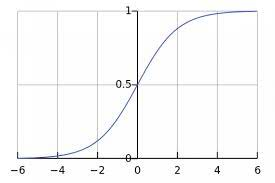

Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа
стремятся к нулю, а положительные — к единице.

Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.

Входной слой: 𝑥 = 2, 𝑦 = 3.

$((𝑥𝑤_1)+(𝑦𝑤_2))+𝑐=20+31+4=7$.

𝑧 = 𝑓(7) = 0.99.

---
## **1.1.2 Пример**
---
### **Решение:**
Для написания кода нейрона будем использовать библиотеку Pytnon — NumPy:

In [ ]:
import numpy as np
def sigmoid(x):
    # функция активации: f(x) = 1 / (1+e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0,1]) # w1=0, w2=1
bias = 4                  # c=4
n = Neuron(weights, bias)
x = np.array([2,3])       # x=2, y=3
print(n.feedforward(x))   # 0.9990889488055994

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.

Пример несложной нейронной сети
![](https://i1.imageban.ru/out/2022/04/29/119ca5b89d421a24bf6b23857e40158f.png)

где:

$𝑥_1,𝑥_2$ — входной слой;
$ℎ_1,ℎ_2$ — скрытый слой с двумя нейронами;
$𝑜_1$ — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса [0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют идентичную сигмоиду.

При входных данных 𝑥 = [2, 3] получим:

$ℎ_1=ℎ_2=𝑓(𝑤𝑥+𝑏)=𝑓((02)+(1\cdot 3)+0)=𝑓(3)=0.95$.

$𝑜_1=𝑓(𝑤\cdot [ℎ_1,ℎ_2]+𝑏)=𝑓((0ℎ_1)+(1ℎ_2)+0)=𝑓(0.95)=0.72$.

Входные данные по нейронам передаются до тех пор, пока не получатся выходные значения.

In [ ]:
import numpy as np
class OurNeuralNetword:
    '''
    Данные нейросети:
        - два входа
        - два нейрона
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0,1])
        bias =  0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы ждя о1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetword()
x = np.array([2,3])
print(network.feedforward(x))

0.7216325609518421


---
## **Теоретический материал – Обучение нейронной сети**
---
Обучение нейросети — это подбор весов, которые соответствуют всем входам для решения поставленных задач.

Класс нейронной сети:
```
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
```
Каждый этап процесса обучения состоит из:

- прямого распространения (прогнозируемый выход);
- обратного распространения (обновление весов и смещений).

Например:

Дана двуслойная нейросеть:

$ŷ=\sigma (𝑤_2\sigma (𝑤_1𝑥+𝑏_1)+𝑏_2)$.

В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и b (смещение). Настройку весов и смещений из данных входа или процесс обучения нейросети можно изобразить так:

![Если изображение не отображается, то снимите блокировку...](https://i.ibb.co/TPjCycy/image.png)
**Прямое распространение**.

Как видно, формула прямого распространения представляет собой несложное вычисление:

$ŷ=\sigma (𝑤_2\sigma (𝑤_1𝑥+𝑏_1)+𝑏_2)$

Далее необходимо добавить в код функцию прямого распространения. Предположим, что смещения в этом случае будут равны 0.

```
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
```
Чтобы вычислить ошибку прогноза, необходимо использовать функцию потери. В примере уместно воспользоваться формулой суммы квадратов ошибок — средним значением между прогнозируемым и фактическим результатами:

$Error=\sum \limits_{i-1}^{n} (y-ŷ)^2$.

---
**Обратное распространение**

Обратное распространение позволяет измерить производные в обратном порядке — от конца к началу, и скорректировать веса и смещения. Для этого необходимо узнать производную функции потери — тангенс угла наклона.

![](https://i.ibb.co/YpbkvQ1/image.png)
Производная функции по отношению к весам и смещениям позволяет узнать градиентный спуск. Производная функции потери не содержит весов и смещений, для ее вычисления необходимо добавить правило цепи:

$Loss(y,ŷ)=\sum \limits_{i=1}^{n} (y-ŷ)^2$

$\dfrac{\partial Loss(y,ŷ)}{\partial W} =\dfrac{\partial Loss(y,ŷ)}{\partial ŷ} \cdot \dfrac{\partial ŷ}{\partial z} \cdot \dfrac{\partial z}{\partial W} =2(y-ŷ)\cdot производную\, сигмоиды\cdot x=2(y-ŷ)\cdot z(1-z)\cdot x,$

где z = Wx+b

Благодаря этому правилу можно регулировать веса. Добавляем в код Python функцию обратного распространения:
```
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # применение правила цепи для нахождения проиводной функции потерь по весу2 и весу 1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y-self.output)*sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y-self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1)))

        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2
```
Нейронные сети базируются на определенных алгоритмах и математических функциях. Сначала может казаться, что разобраться в них довольно сложно. Но существуют готовые библиотеки машинного обучения для построения и тренировки нейросетей, позволяющие не углубляться в их устройство.


---
## **Задание:**
---

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.

Данные нейросети:
- три входа $(𝑥_1,𝑥_2,𝑥_3)$;
- три нейрона в скрытых слоях $(h_1,h_2,h_3)$;
- выход $(o_1)$.

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [0.5, 0.5, 0.5]
- 𝑏 = 0

Данные нейросети:
- два входа $(𝑥_1,𝑥_2)$;
- два нейрона в скрытых слоях $(h_1,h_2)$;
- два выхода $(o_1,o_2)$.

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [1, 0];
- 𝑏 = 1.

### **Решение:**

In [7]:
from numpy import exp, dot, array
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = dot(self.weights, inputs) + self.bias
        return 1/(1+exp(-total))
class NeuralNetword2:
    '''
    Данные нейросети:
        - три входа
        - три нейрона в скрытых слоях
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0.5, 0.5, 0.5]
        - b = 0
    '''
    def __init__(self):
        weights = array([0.5, 0.5, 0.5])
        bias =  0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(array([out_h1, out_h2, out_h3]))
        return out_o1

network2 = NeuralNetword2()
x = array([1, 2, 3]) #входные данные не указаны, рассмотрим на таком наборе
print(network2.feedforward(x))
# Как было рассмотрено в теории, нейрон имеет один выход,
# вычисляемый по функции активации. Смысл которой в том,
# что показывает активирован ли нейрон. Исходя из понятий
# биологии, аксон (выход) может иметь несколько терминалов
# поэтому ни что не мешает добавить несколько выходов при
# реализации сети нейронных сетей. Однако выходы будут иметь одно
# значение и не понятно, зачем это реализовывать для одной
# нейросети, которая не связана с другими сетями.
class NeuralNetword3:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях
        - два выхода (о1, o2)
    Нейроны имеют идентичные веса и пороги:
        - w = [1, 0]
        - b = 1
    '''
    def __init__(self):
        weights = array([1, 0])
        bias =  1
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o = Neuron(weights, bias)
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_o = self.o.feedforward(array([out_h1, out_h2]))
        return out_o, out_o

network3 = NeuralNetword3()
x = array([1, 2])
print(network3.feedforward(x))

0.8067238139969796
(0.8677026536525567, 0.8677026536525567)


---
## **Задание:**
---

Реализуйте классы нейронных сетей с использованием других функций
активации.

![](https://i.ibb.co/Gc3rLmR/image.png)

### **Решение:**

In [22]:
from numpy import exp, dot, full
# для сигмоиды
class NeuralWithSigmoid:
    def __init__(self, weights, bias, x):
        self.weights = weights
        self.bias = bias
        self.x = x
    def feedforward(self):
        self.x = 1/(1+exp(-dot(self.weights, self.x) - self.bias))
        return self
# думаю суть класса понятна, при составлении связанной цепи для выбора
# нужно числа выходов можно обращаться по индексу. Когда одна сеть
# является входом для другой, необходимо лишь создать новый экзепляр
# с соответствующим значением x и уже новыми весами и порогами
NeuralSigmoid = NeuralWithSigmoid([0.5, 0.5, 0.5], [0, 0, 0], [1, 2, 3])
print(NeuralSigmoid.feedforward().feedforward().x)

# для tanh
class NeuralWithTanh:
    def __init__(self, weights, bias, x):
        self.weights = weights
        self.bias = bias
        self.x = x
    def feedforward(self):
        self.x = 2/(1+exp(-2*(dot(self.weights, self.x) + self.bias))) - 1
        return self
NeuralTanh = NeuralWithTanh([0.5, 0.5, 0.5], [0, 0, 0], [1, 2, 3])
print(NeuralTanh.feedforward().feedforward().x)

class NeuralWithReLU:
    def __init__(self, weights, bias, x):
        self.weights = weights
        self.bias = bias
        self.x = x
    def feedforward(self):
        for i in range(x.size):
            tmp = dot(self.weights[i], self.x[i]) + self.bias[i]
            self.x[i] = tmp if (tmp > 0) else 0
        return self
NeuralReLU = NeuralWithReLU([0.5, 0.5, 0.5], [0, 0, 0], [1, 2, 3])
print(NeuralReLU.feedforward().feedforward().x)

[0.80672381 0.80672381 0.80672381]
[0.90379876 0.90379876 0.90379876]
[0.25, 0.5, 3]


---
## **1.2 Введение в нейронные сети с помощью Scikit-Learn в Python**
---
Теперь мы знаем, что такое нейронные сети и какие шаги необходимо выполнить, чтобы построить простую нейронную сеть с плотными связями. В этом разделе мы попытаемся построить простую нейронную сеть, которая предсказывает класс, к которому принадлежит данное растение ириса. Мы будем использовать библиотеку Python Scikit-Learn для создания нашей нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:
- MLPClassifier;
- MLPRegressor

Начнем с импорта необходимых библиотек.

In [ ]:
# загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

---
## **MLPClassifier**
---
Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр, который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор данных о жилье в Бостоне, который содержит информацию о различных свойствах дома, таких как среднее количество комнат, уровень преступности на душу населения в городе и т. д. Мы будем использовать его для задач регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить их, вызвав методы load_digits() и load_boston().

In [66]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


In [67]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 13) (506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Классификация

MLPClassifier — это класс, доступный как часть модуля neuro_network sklearn для выполнения задач классификации с использованием многослойного персептрона.

Как обычно разделим набор данных на две части:
- данные обучения, которые будут использоваться для модели обучения;
- тестовые данные, по которым будет проверяться точность обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам разделить данные на два набора: 80% для обучения и 20% для тестирования. Мы также используем seed(random_state=123) с train_test_split, чтобы мы всегда получали одно и то же разделение и могли сравнивать и воспроизволить результаты в будущем.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию для тренировочных данных.

In [69]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [70]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# Метод Score для оценки точности моделей классификации.
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и предсказанные метки данных по модели. Затем он строит матрицу путаницы, используя matplotlib.

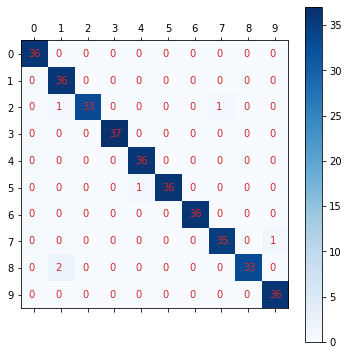

In [71]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range (10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color='tab:red')
    
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, которые могут предоставить значимую информацию после обучения модели.
- loss_ — возвращает убыток после завершения процесса обучения.
- coefs_ — возвращает массив длины n_layers-1, где каждый элемент представляет веса, связанные с уровнем i.
- intercepts_ — возвращает массив длины n_layers-1, где каждый элемент представляет собой перехват, связанный с персептронами слоя i.
- n_iter_ — количество итераций, для которых выполнялась оценка.
- out_activation_ — возвращает имя функции активации выходного слоя.

In [ ]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

Loss :  0.003472868499418059
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


---
## **MLPRegressor**
---
MLPRegressor — это класс, доступный как часть библиотеки neuro_network sklearn для выполнения задач регрессии с использованием многослойного персептрона. Также разделим набор данных на две части:
- данные обучения (80%), которые будут использоваться для модели обучения;
- тестовые данные (20%), по которым будет проверяться точность обученной модели.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [ ]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
# Метод Score оценивает точность моделей классификации.
print('Test R^2 Score : %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score : 0.462
Training R^2 Score : 0.510


MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:

In [ ]:
print("Loss : ", mlp_regressor.loss_)

Loss :  28.538174061119584


In [ ]:
print("Number of Coefs : ", len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [ ]:
print("Number of Intercepts : ", len(mlp_regressor.intercepts_))
[weights.shape for weights in mlp_regressor.intercepts_]

Number of Intercepts :  2


[(100,), (1,)]

In [ ]:
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran :  130


In [ ]:
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)

Name of Output Layer Activation Function :  identity


---
## **1.2.1 Задание**
---
### **Задание:**
Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:

https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:

https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv
### **Решение:**

In [103]:
#MLPClassified
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

dataset = read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
x = dataset[['sepal.length','sepal.width','petal.length','petal.width']]
y = dataset['variety']
print('Dataset Sizes : ', x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, stratify=y, random_state=123)
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)
y_preds = mlp_classifier.predict(x_test)
print(DataFrame({'y_preds': y_preds[:15], 'y_test': y_test[:15]}))
print('Test Accuracy : %.3f'%mlp_classifier.score(x_test, y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(x_train, y_train))
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Intercepts : ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

#MLPRegressor
from sklearn.neural_network import MLPRegressor
dataset = read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
#x = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 1].values
print('Dataset Sizes : ', x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)
y_preds = mlp_regressor.predict(x_test)
print(DataFrame({'y_preds': y_preds[:10], 'y_test': y_test[:10]}))
print('Test Accuracy : %.3f'%mlp_regressor.score(x_test, y_test))
print('Training Accuracy : %.3f'%mlp_regressor.score(x_train, y_train))
print("Loss : ", mlp_regressor.loss_)
print("Number of Coefs : ", len(mlp_regressor.coefs_))
print("Number of Intercepts : ", len(mlp_regressor.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_regressor.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_regressor.out_activation_)
# либо я сделал что-то не так, либо этот метод регресии основанный на
# нейронных сетях, вовсе не эффективен на минимальном наборе признаков.
# Считаю второй вариант более правдоподобным.

Dataset Sizes :  (150, 4) (150,)
Train/Test Sizes :  (120, 4) (30, 4) (120,) (30,)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


        y_preds      y_test
80   Versicolor  Versicolor
45       Setosa      Setosa
144   Virginica   Virginica
110   Virginica   Virginica
38       Setosa      Setosa
2        Setosa      Setosa
135   Virginica   Virginica
72    Virginica  Versicolor
138   Virginica   Virginica
34       Setosa      Setosa
19       Setosa      Setosa
77   Versicolor  Versicolor
101   Virginica   Virginica
63   Versicolor  Versicolor
117   Virginica   Virginica
Test Accuracy : 0.933
Training Accuracy : 0.983
Loss :  0.2988789340197433
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  200
Name of Output Layer Activation Function :  softmax
Dataset Sizes :  (30, 1) (30,)
Train/Test Sizes :  (24, 1) (6, 1) (24,) (6,)
      y_preds    y_test
7   20.262346   54445.0
29  55.278175  121872.0
5   18.821358   56642.0
26  50.482745  116969.0
8   20.262346   64445.0
27  50.962288  112635.0
Test Accuracy : -8.796
Training Accuracy : -8.261
Loss :  2988058032.1601596
Numb

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
